**About**

This notebook was prepared by Dr. Karthik Mohan for the LLM 2024 course at University of Washington, Seattle and is inspired by this writeup: https://arxiv.org/abs/2401.14423

Lecture delivered on February 8, 2024

Class webpage: https://bytesizeml.github.io/llm2024/

Topics covered in Lecture:

1. Rails
1. Automated Prompt Engineering (APE)
1. Agents

### Setup

In [ ]:
# 1. Install Libraries
!pip3 install openai
!pip3 install python-dotenv


# 2. Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
print(os.system('ls'))

os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

# 3. Open AI API Access Setup
import openai
import os

open_ai_key_file = "openai_api_key_llm_2023.txt" # Your OPEN AI Key in this file
with open(open_ai_key_file, "r") as f:
  for line in f:
    OPENAI_KEY = line
    break

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())


# 4. Tools Setup

import os

with open("google_cse_id.txt", "r") as f_cse:
  for line in f_cse:
    google_cse_id = line.strip("\n")
    break

with open("google_api_key.txt", "r") as f_cse:
  for line in f_cse:
    google_api_key = line.strip("\n")
    break

os.environ["GOOGLE_CSE_ID"] = google_cse_id
os.environ["GOOGLE_API_KEY"] = google_api_key

!pip3 install langchain
from langchain.tools import Tool
from langchain.utilities import GoogleSearchAPIWrapper

search = GoogleSearchAPIWrapper()

tool = Tool(
    name = "Google Search",
    description = "Search Google for recent results.",
    func = search.run
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
Mounted at /content/drive/
0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.7/806.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### OPEN AI Setup

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-3.5-turbo"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

## 1. Advanced Prompt Engineering

### A. Rails
Rails refers to "guard-rails" for LLMs - Directing and guiding the LLM to stick to certain styles of responses. Different types of rails:

1. Topical Rails: Ensures that LLM sticks to topic (staying relevant)
1. Fact-Checking Rails: Aimed at minimizing the generation of false or misleading information
1. Jail-breaking Rails: Prevent LLM from generating responses that bypass its own operational constraints or guidelines

You can use Topical and Fact-checking rails in your mini-project 2

### B. Automatic Prompt Engineering (APE)

1. Prompt engineering can be a time-consuming process that changes from task to task.
1. Automatic Prompt Engineering (APE) alleviates the time spent engineering good prompts through automated suggestion of prompts that would help with a task.
1. APE involves leveraging the capability of LLMs itself in generating good prompts for a given task.
1. In APE, an LLM can be asked to score and evaluate the prompts it generates
1. Post evaluation, LLM picks a prompt from APE that has the highest score and uses it as "its prompt" to solve the task!

#### APE Example 1

In [ ]:
def get_prompt(task):
  """
  Automatically Generate a prompt given a task
  """
  APE_prompt = "Given a task that I want accomplished by an LLM as follows, can you generate an appropriate prompt that I can pass in to get a good response. The prompt should include an example as well:  " + task
  prompt = get_completion(APE_prompt)
  return prompt

In [ ]:
task = "Explain the steps as visually seen for fixing a flat tire"
prompt = get_prompt(task)

print("Automatically Generated Prompt: \n")
print(prompt)
print("\n\n LLM Response: \n")
print(get_completion(prompt))

Automatically Generated Prompt: 

Prompt: Please provide a step-by-step explanation, with visual references, on how to fix a flat tire.

Example: Imagine you are driving down the road in your car when suddenly you hear a loud hissing noise. You quickly realize that you have a flat tire. In order to help others facing a similar issue, please provide a detailed explanation, accompanied by visual aids, on how to fix a flat tire.


 LLM Response: 

Step 1: Find a Safe Location
The first step to fixing a flat tire is to find a safe location to pull over. This could be a nearby parking lot, a wide shoulder, or a flat, straight section of road. Ensure that you are away from traffic and have enough space to work comfortably.

Step 2: Gather Equipment
Before you start fixing the flat tire, gather all the necessary equipment. You will need:

- Spare tire
- Lug wrench
- Jack
- Wheel wedges
- Flashlight
- Vehicle owner's manual

Step 3: Apply Wheel Wedges
To prevent the vehicle from rolling, place

### ICE 1:
Use an APE function like above to automatically generate a prompt to execute the following task: "Generate streamlit code to develop a search bar that can take in a sentence and output relevant categories for the sentence as a response. The webapp should be simple, functional and have some style to it."

Also execute the LLM-generated prompt to check if the result looks reasonable.



In [ ]:
## ICE 1 - Your CODE HERE!

#### ICE 2 - LLM code to the rescue!
Copy the above LLM generated code over to an IDE on your laptop and execute it with streamlit to see if you get the desired web app with the specifications mentioned in the task above?

Post a screen shot of the web-app that got generated below!

In [ ]:
## ICE 2 - Your web-app Screenshot HERE!

### B2. APE with prompt scoring

The previous APE method only generated one prompt and used it.
What if we generate multiple prompts and have the LLM evaluate these prompts for clarity, specificity and likelihood of desire response. And then pick the one that has overall good score?

In [ ]:
class APE:

  def __init__(self, model=None):
    self.model=model

  def prompt_generator(self, task):
    """
    Automatically Generate a prompt given a task
    """
    APE_prompt = "Given a task that I want accomplished by an LLM as follows, can you generate an appropriate prompt that I can pass in to get a good response. The prompt should include an example as well:  " + task
    if self.model:
      prompt = get_completion(APE_prompt,model=self.model)
    else:
      prompt = get_completion(APE_prompt)
    return prompt

  def prompt_evaluator(self,task):
    """
    Generate multiple automated prompts and evaluate them based on a criteria
    """

    prompts = []
    # Generate multiple prompts automatically
    for index in range(3):
      prompts.append(self.prompt_generator(task))

    # Prompt for evaluation
    evaluator_prompt = "Given the following list of prompts: " + str(prompts) + \
                        " ,evaluate and return goodness scores betweeen 0 and 1 on a) clarity and b) likelihood of generating a good response from LLM for the following task. Also make a recommendation for a prompt to use:" + \
                        task

    return prompts, get_completion(evaluator_prompt)




In [ ]:
task = "Explain the steps as visually seen for fixing a flat tire"
APE_instance = APE()
prompts, prompt_evaluations = APE_instance.prompt_evaluator(task) # Evaluate multiple Automatically Generated Prompts
index = 1
for prompt in prompts:
  print("\n Prompt " + str(index) + "\n")
  print(prompt)
  index += 1
print(prompt_evaluations)


 Prompt 1

Prompt: Guide me through the visual steps involved in fixing a flat tire on a car, providing a clear example for each step.

Example: Imagine you are driving down the road and suddenly you hear a loud thumping noise from one of your car's tires. You pull over to the side of the road to find that one of your tires is completely flat. In a detailed response, visually explain the step-by-step process of fixing a flat tire, including an example for each step to ensure clarity.

 Prompt 2

Title: Visual Guide: Step-by-Step Process for Fixing a Flat Tire

Prompt:
Your task is to provide a visual explanation of the sequential steps involved in fixing a flat tire. Please break down the process into easy-to-follow steps and include a diagram to illustrate each stage. Use clear and concise language along with a coherent structure to ensure clarity within your response.

Example Scenario:
Imagine you are driving home from work when suddenly you hear a loud "pop" followed by a noticeab

### B3. APE using Automatic_Prompt_Engineer

As we saw in B2 - If the task is already clearly specified, then perhaps there is no need to do APE as the task description serves as a prompt.

Here, we look at a more useful use-case for APE using the APE library:

1. Assume there is a data set of (inputs, outputs)
1. For instance inputs and outputs could be drawn from a database table
1. You want to have APE figure out a prompt that captures the relationship between inputs and outputs and generate it.
1. Once the APE generates a good candidate prompt you can use it to for auto-generating outputs given an input
1. In this case, the APE is generating a prompt that can be used to automatically label inputs!

Very good use-case for LLM as an annotator!

We will now "attempt to" use a library for Automatic Prompt Engineering called Automatic Prompt Engineer: https://github.com/keirp/automatic_prompt_engineer

#### Attempt to use Automatic Prompt Engineer

In [ ]:
## Install Automatic Prompt Engineer
! pip install git+https://github.com/keirp/automatic_prompt_engineer

  Cloning https://github.com/keirp/automatic_prompt_engineer to /tmp/pip-req-build-pn3v0vd0
  Running command git clone --filter=blob:none --quiet https://github.com/keirp/automatic_prompt_engineer /tmp/pip-req-build-pn3v0vd0
  Resolved https://github.com/keirp/automatic_prompt_engineer to commit eac521c79a78965245ce7745dcc9f6b0792c7ec7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/

In [ ]:
# First, let's define a simple dataset consisting of words and their antonyms.
words = ["sane", "direct", "informally", "unpopular", "subtractive", "nonresidential", \
    "inexact", "uptown", "incomparable", "powerful", "gaseous", "evenly", "formality",
    "deliberately", "off"]
antonyms = ["insane", "indirect", "formally", "popular", "additive", "residential",
    "exact", "downtown", "comparable", "powerless", "solid", "unevenly", "informality",
    "accidentally", "on"]

In [ ]:
eval_template = \
"""Instruction: [PROMPT]
Input: [INPUT]
Output: [OUTPUT]"""

# Now, let's use APE to find prompts that generate antonyms for each word.
from automatic_prompt_engineer import ape

result, demo_fn = ape.simple_ape(
    dataset=(words, antonyms),
    eval_template=eval_template,
)

# Let's see the results.
print(result)

### B4. Using the class we created to generate a prompt automatically!

In [ ]:
task = "Given inputs: " + str(words) + " ,and their corresponding outputs: " + str(antonyms) + " ,a) you MUST find the relationship between inputs and outputs b) Using the relationship identified, write in a concise sentence a task that can generate an output given an input"
APE_instance = APE(model="gpt-4")
prompts, prompt_evaluations = APE_instance.prompt_evaluator(task) # Evaluate multiple Automatically Generated Prompts
index = 1
for prompt in prompts:
  print("\n Prompt " + str(index) + "\n")
  print(prompt)
  index += 1
print(prompt_evaluations)


 Prompt 1

Prompt:
The task involves the identification and understanding of the relationships between pairs of words. These pairs of words are opposites of each other. For example, the opposite of 'sane' is 'insane', and the opposite of 'direct' is 'indirect'. Given this pattern, your task is to find the opposite of each word in the given list. Here is an example to assist you - if the given word is 'informally', your output should be 'formally'.

 Prompt 2

Prompt:
Your task is to figure out the relationship between the two given list of words. Here is an example to help you understand the task:

Input: ['sane', 'direct', 'informally', 'unpopular', 'subtractive', 'nonresidential', 'inexact', 'uptown', 'incomparable', 'powerful', 'gaseous', 'evenly', 'formality', 'deliberately', 'off']
Output: ['insane', 'indirect', 'formally', 'popular', 'additive', 'residential', 'exact', 'downtown', 'comparable', 'powerless', 'solid', 'unevenly', 'informality', 'accidentally', 'on']

From this exa

#### Let's evaluate the prompt we just APE-generated!

In [ ]:
task = "Given inputs: " + str(words) + "For each word in the input, identify its antonym."
print(get_completion(task))

sane - insane
direct - indirect
informally - formally
unpopular - popular
subtractive - additive
nonresidential - residential
inexact - exact
uptown - downtown
incomparable - comparable
powerful - weak
gaseous - solid
evenly - unevenly
formality - informality
deliberately - accidentally
off - on


### B5. Another APE example
Working with numbers

In [ ]:
inputs = [1,2,5,21]
outputs = [1,3,8,34]
task = "Given inputs: " + str(inputs) + " ,and their corresponding outputs: " + str(outputs) + " ,a) You MUST find the relationship between inputs and outputs and respond in a single sentence. Also verify that this relationship is true. b) Using the relationship identified, write in a concise sentence a task that can generate an output for every input in the input list"
APE_instance = APE()
prompts, prompt_evaluations = APE_instance.prompt_evaluator(task) # Evaluate multiple Automatically Generated Prompts
index = 1
for prompt in prompts:
  print("\n Prompt " + str(index) + "\n")
  print(prompt)
  index += 1
print(prompt_evaluations)


 Prompt 1

a) The relationship between the inputs and outputs is that each output is generated by multiplying the corresponding input by itself and adding the input to the result. The relationship is true for all the given examples.

b) Write a task to generate an output for every input in the input list by multiplying each input by itself and adding the input to the result. For example, given an input of 5, the task would generate an output of 5 multiplied by 5 plus 5, resulting in 34.

 Prompt 2

Prompt: Please identify the relationship between the given inputs [1, 2, 5, 21] and their corresponding outputs [1, 3, 8, 34] in a single sentence and verify its accuracy. Then, formulate a concise task that can generate an output for every input in the input list using the identified relationship.

Example Task Prompt:
Consider the inputs [1, 2, 5, 21] and their corresponding outputs [1, 3, 8, 34]. The relationship between inputs and outputs is that each output can be obtained by multiplyi

#### Let's use gpt-4

In [ ]:
inputs = [1,2,5,21]
outputs = [1,3,8,34]
task = "Given inputs: " + str(inputs) + " ,and their corresponding outputs: " + str(outputs) + " ,a) You MUST find the relationship between inputs and outputs and respond in a single sentence. Also verify that this relationship is true. b) Using the relationship identified, write in a concise sentence a task that can generate an output for every input in the input list"
APE_instance = APE(model="gpt-4")
prompts, prompt_evaluations = APE_instance.prompt_evaluator(task) # Evaluate multiple Automatically Generated Prompts
index = 1
for prompt in prompts:
  print("\n Prompt " + str(index) + "\n")
  print(prompt)
  index += 1
print(prompt_evaluations)


 Prompt 1

"Given a sequence of inputs [1, 2, 5, 21] with corresponding outputs [1, 3, 8, 34], identify the relationship between the inputs and outputs and confirm its validity in a single sentence. Then, based on the established relationship, generate a directive in a concise sentence that can be used to calculate an output for any given input in the list. For instance, if the inputs are [2, 4, 6] and their corresponding outputs are [4, 6, 8] the relationship would be 'each output is obtained by adding two to the corresponding input', and the task can be 'add two to each input to generate the respective output'."

 Prompt 2

"In the provided data, inputs are [1, 2, 5, 21] and their corresponding outputs are [1, 3, 8, 34]. Describe the relationship between these inputs and outputs in a single sentence, and verify this relationship. Based on your observation, then provide a sentence that describes a task to generate an output based on each input from the list. For example, given inputs

## C. LLM Agents

1. An autonomous entity that perceives the environment, makes a judgment of state and takes a decision based on that.
1. There is a perception of context, of when a question is asked, what is the nature of the query, etc
1. Agent can invoke sub-agents to help with sub-tasks
1. Example: Agent thinks it needs to calculate something using a calculator. Agent calls the calculator to query the computation and get response. Agent then uses the computed response in its over-all response.
1. Agent combines LLM + Tools + State tracking for better decision making
1. Examples: Weather Agent - Can use weather API and weather news to get latest on weather

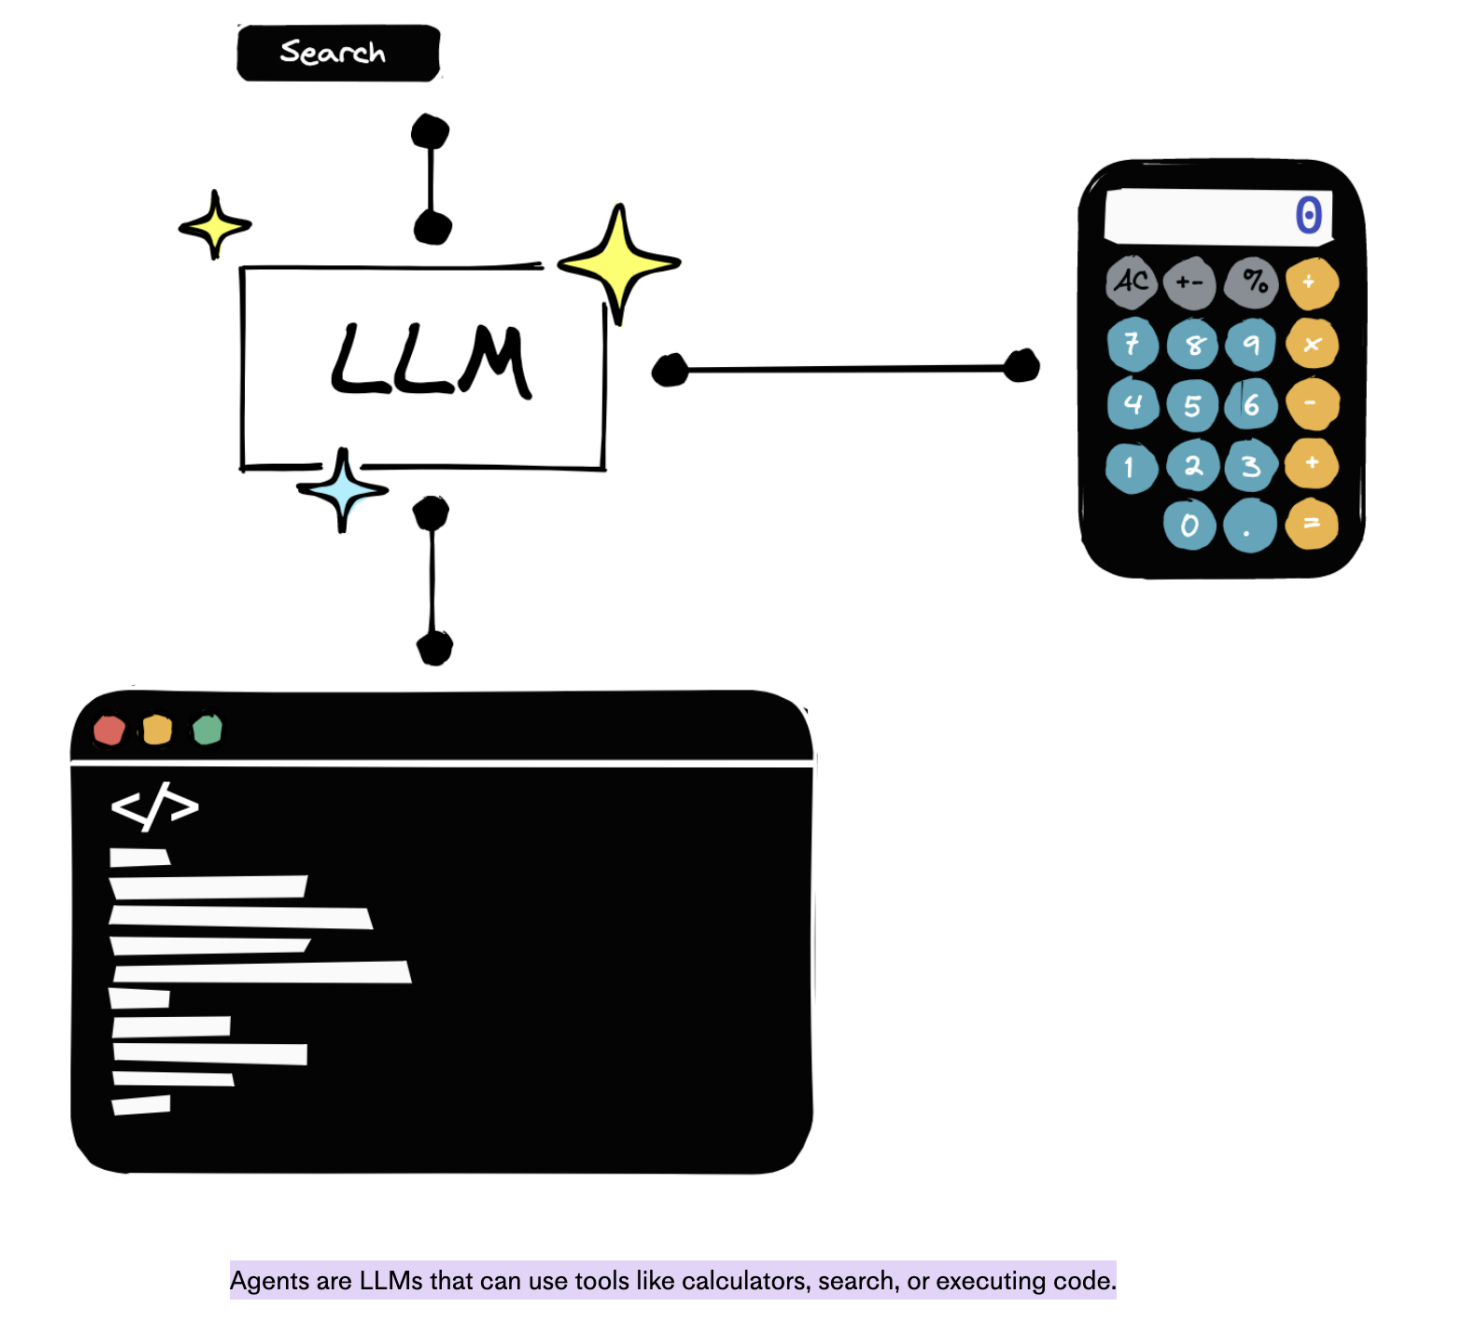

In [ ]:
from IPython.display import Image, display

imageName = "llm_agent_1.png" # Referenced from https://investor.fb.com/stock-info/
display(Image(filename=imageName))

### C1. Agent 101

In [ ]:
class LLMAgent:

  def __init__(self):
    pass


  def is_llm_topic(self, query):

    prompt = "Is this query about the technical aspects of an LLM? Answer in True or False: " + query
    return get_completion(prompt)

  def get_topic(self, query):
    prompt = "Return in one word, the topic of this query: " + query
    return get_completion(prompt)

  def main_agent(self, query):
    truth = str(self.is_llm_topic(query))
    if "True" in truth or "true" in truth:
      return self.llm_agent(query)
    else:
      topic = self.get_topic(query)
      return self.funny_agent(topic=topic)


  def funny_agent(self,topic="minion", style="hipster"):

    task = "Give me exactly one joke on " + topic + "." + " Crack the joke in " + style + " style."
    return get_completion(task)


  def llm_agent(self,query):
    task = "Assume you are a chatbot that responds to messages. You just got this message, respond to it appropriately: " + query
    return get_completion(task)





In [ ]:
llmagent = LLMAgent()
print(llmagent.funny_agent())
query = "How do you avoid biases in llm annotations using open source LLMs?"
print("\n")
print(llmagent.main_agent(query))
print("\n")
query = "How's the weather in Seattle?"
print(llmagent.main_agent(query))





Why did the weather go to therapy?
Because it felt trapped in a cycle of unpredictable emotional storms, but now it's really into mindfulness and only manifests weather patterns that align with its truest, most authentic self.
